In [3]:
import qpms
import numpy as np
from numpy import newaxis as nx
import math
import cmath
from scipy.constants import c, e as eV, hbar
s3 = math.sqrt(3)
J_scat = 3

In [4]:
epsilon_b = 2.3104
hexside = 375e-9
cdn = c/ math.sqrt(epsilon_b)
maxlayer=4

omegalist=np.linspace(0,5e15,200)
#omegalist=np.linspace(0,3,3.2)*eV/hbar
#omegalist = np.array([1.5,])*eV/hbar

bz_0 = np.array((0,0,))
bz_K1 = np.array((1.,0))*4*np.pi/3/hexside/s3
bz_K2 = np.array((1./2.,s3/2))*4*np.pi/3/hexside/s3
bz_M = np.array((3./4, s3/4))*4*np.pi/3/hexside/s3

# reciprocal lattice basis
B1 = 2* bz_K1 - bz_K2
B2 = 2* bz_K2 - bz_K1

In [5]:
kdensity = 100
k0Mlist = bz_0 + (bz_M-bz_0) * np.linspace(0,1,kdensity)[:,nx]
kMK1list = bz_M + (bz_K1-bz_M) * np.linspace(0,1,kdensity)[:,nx]
kK10list = bz_K1 + (bz_0-bz_K1) * np.linspace(0,1,kdensity)[:,nx]
k0K2list = bz_0 + (bz_K2-bz_0) * np.linspace(0,1,kdensity)[:,nx]
kK2Mlist = bz_K2 + (bz_M-bz_K2) * np.linspace(0,1,kdensity)[:,nx]
klist = np.concatenate((k0Mlist,kMK1list,kK10list,k0K2list,kK2Mlist), axis=0)
kxmaplist = np.concatenate((np.array([0]),np.cumsum(np.linalg.norm(np.diff(klist, axis=0), axis=-1))))

In [6]:
centers=np.array([bz_0,B1,B2,-B1,-B2,B2-B1,-B2+B1,-B2-B1,B2+B1,-2*B1,-2*B2,-2*B2-B1,-2*B1-B2,-2*B1-2*B2])
centers2=qpms.generate_trianglepoints(maxlayer, v3d = False, include_origin= True)*4*np.pi/3/hexside
rot90 = np.array([[0,-1],[1,0]])
centers2=np.dot(centers2,rot90)

0.0
23108852.2589


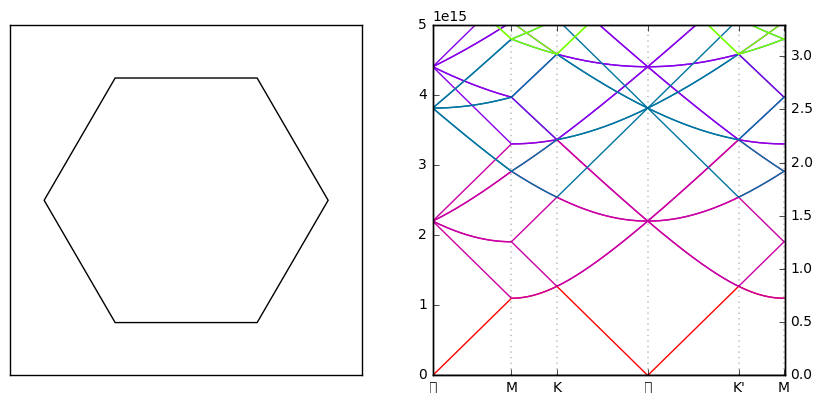

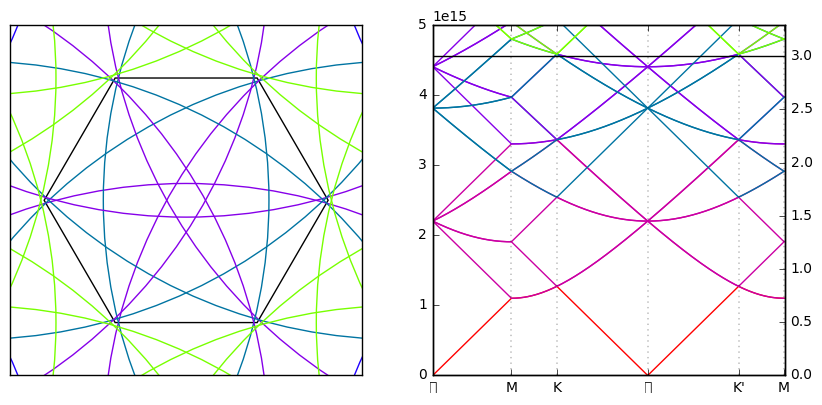

In [9]:
#%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.path import Path
import matplotlib.patches as patches
cmap = matplotlib.cm.prism
colormax = np.amax(np.linalg.norm(centers2,axis=0))
for oi in range(omegalist.shape[0]):
    omega = omegalist[oi]
    f, axes = plt.subplots(1,2, figsize=(10,4.52))
    ax = axes[0]
    #sc = ax.scatter(k2list[:,0], k2list[:,1], c = np.clip(np.abs(minsvTElistarr[oi,...,minN]),0,1), lw=0)
    for center in centers2:
        circle=plt.Circle((center[0],center[1]),omega/cdn, facecolor='none', edgecolor=cmap(np.linalg.norm(center)/colormax),lw=1)
        ax.add_artist(circle)
    verts = [(math.cos(math.pi*i/3)*4*np.pi/3/hexside/s3,math.sin(math.pi*i/3)*4*np.pi/3/hexside/s3) for i in range(6 +1)]
    codes = [Path.MOVETO,Path.LINETO,Path.LINETO,Path.LINETO,Path.LINETO,Path.LINETO,Path.CLOSEPOLY,]
    path = Path(verts, codes)
    patch = patches.PathPatch(path, facecolor='none', edgecolor='black',  lw=1)
    ax.add_patch(patch)
    ax.set_xlim([-8e6,8e6])
    ax.set_ylim([-8e6,8e6])
    ax.set_xticks([]) 
    ax.set_yticks([]) 
    #ax.scatter(centers2[:,0], centers2[:,1])
    print(omega/cdn)
    #f.colorbar(sc,ax=ax)
    
    ax = axes[1]
    for center in centers2:
        ax.plot(kxmaplist, np.linalg.norm(klist-center,axis=-1)*cdn, '-', color=cmap(np.linalg.norm(center)/colormax))

    #ax.set_xlim([np.min(kxmlarr),np.max(kxmlarr)])
    #ax.set_ylim([np.min(omegalist),np.max(omegalist)])
    xticklist = [0, kxmaplist[len(k0Mlist)-1], kxmaplist[len(k0Mlist)+len(kMK1list)-1], kxmaplist[len(k0Mlist)+len(kMK1list)+len(kK10list)-1], kxmaplist[len(k0Mlist)+len(kMK1list)+len(kK10list)+len(k0K2list)-1], kxmaplist[len(k0Mlist)+len(kMK1list)+len(kK10list)+len(k0K2list)+len(kK2Mlist)-1]]
    ax.set_xticks(xticklist)
    for xt in xticklist:
        ax.axvline(xt, ls='dotted', lw=0.3,c='k')
    ax.set_xticklabels(['Γ', 'M', 'K', 'Γ', 'K\'','M'])
    ax.axhline(omega, c='black')
    ax.set_ylim([0,5e15])
    ax2 = ax.twinx()
    ax2.set_ylim([ax.get_ylim()[0]/eV*hbar,ax.get_ylim()[1]/eV*hbar])
    f.savefig("diforder-%.4f.pdf"%(omega/eV*hbar,))


In [36]:
import itertools
list(itertools.chain([1, 3, i] for i in range(4)))

[[1, 3, 0], [1, 3, 1], [1, 3, 2], [1, 3, 3]]